In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Camera 1, sunny

In [4]:
#compare the accuracy for different preprocessing methods
preproc = ['none', 'rot', 'blur', 'eq']
for p in preproc:
    globals()["C1S_data_{}".format(p)] = pd.read_csv("../../results/CNR/camera1/sunny/classified_sample_preproc_{}.csv".format(p))

### distribution of confidence scores and predictions

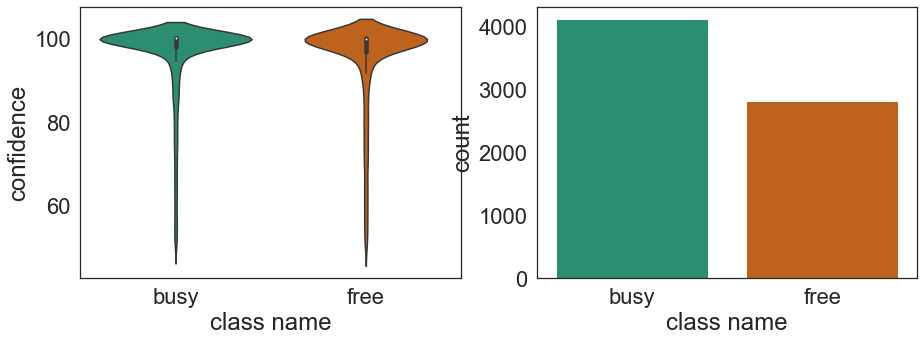

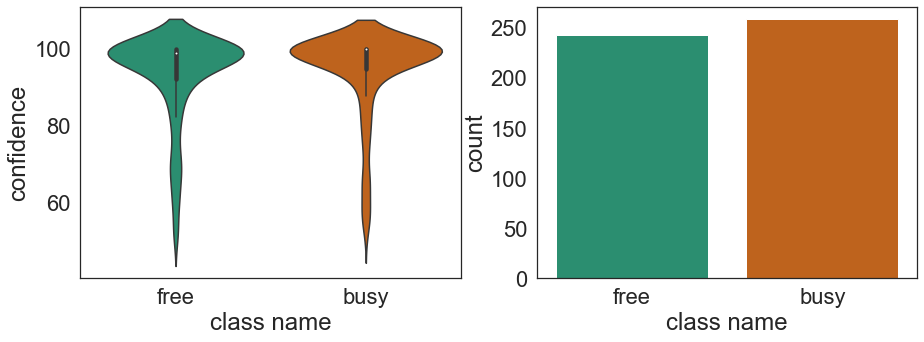

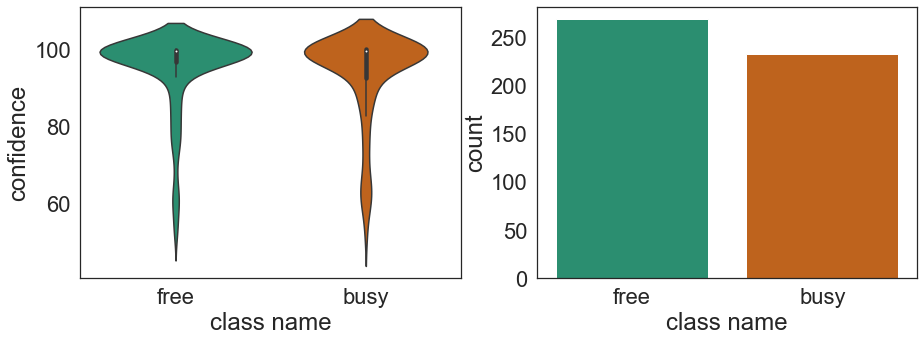

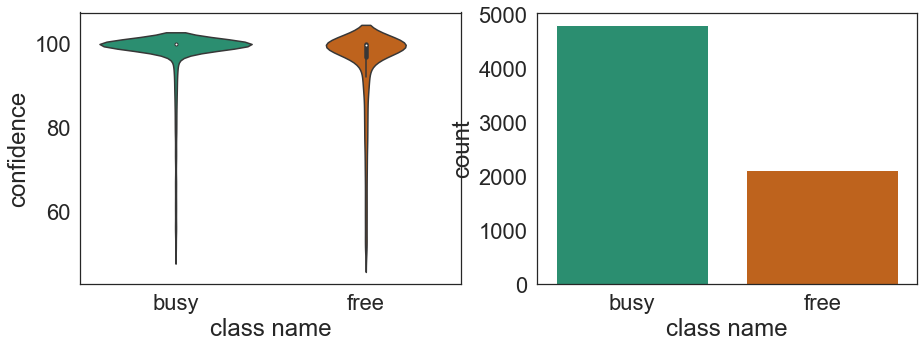

In [5]:
sns.set_theme(style="white", palette='Dark2', font_scale=2)

for p in preproc: 
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    sns.violinplot(x="class_name", y="confidence", data=globals()["C1S_data_{}".format(p)], ax=ax[0])
    sns.countplot(x="class_name", data=globals()["C1S_data_{}".format(p)], ax=ax[1])

    ax[0].set_xlabel("class name")
    ax[1].set_xlabel("class name")
    ax[0].set_ylabel("confidence")
    fig.savefig("../../results/CNR/camera1/sunny/confidence_{}.png".format(p), bbox_inches='tight')



# accuracy

In [6]:
preproc = ['none', 'rot', 'blur', 'eq']
condition = ['sunny', 'overcast', 'rainy'] 
for p in preproc:
    for c in condition:
        with open("../../results/CNR/camera1/{}/accuracy_preproc_{}.txt".format(c,p), 'r') as f:
            globals()["C1_{}_acc_{}".format(c[0].upper(), p)] = float(f.readline().split()[-1])

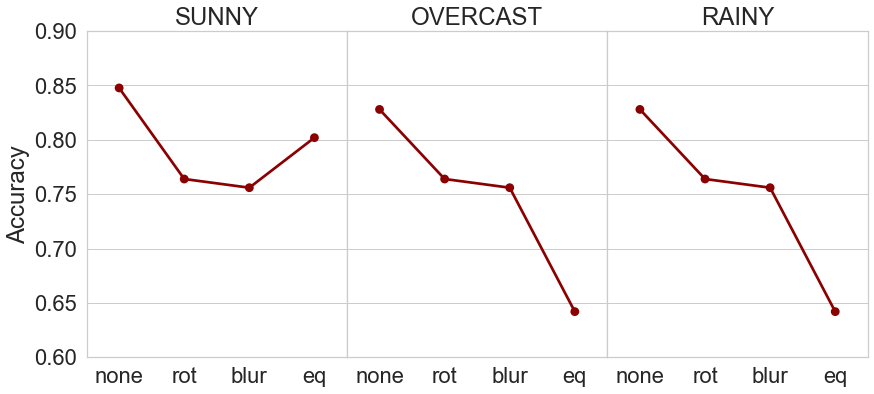

In [7]:
accuracy_df = pd.DataFrame(columns=['preprocessing', 'accuracy'])
sns.set_theme(style="whitegrid", palette='Dark2', font_scale=2)

for p in preproc:
    for c in condition:
        accuracy_df = accuracy_df.append({'preprocessing': p, 'accuracy': globals()["C1_{}_acc_{}".format(c[0].upper(), p)], 'Weather': c}, ignore_index=True)
accuracy_df
fig, ax = plt.subplots(1,3, figsize=(14,6))

i = 0
for c in condition:
    sns.pointplot(x="preprocessing", y="accuracy", data=accuracy_df[accuracy_df['Weather']==c], 
                    join=True, linestyle='--', ax=ax[i], color='darkred')
    ax[i].set_ylim(0.6, 0.9)
    ax[i].set_xlabel("")
    ax[i].set_title(c.upper())
    if i != 0:
        ax[i].set_yticklabels([])
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("Accuracy")
    i += 1

fig.subplots_adjust(hspace=.0, wspace=0.)
fig.savefig("../../results/CNR/camera1/accuracy.png", bbox_inches='tight')